MSE:4.2553963965976065


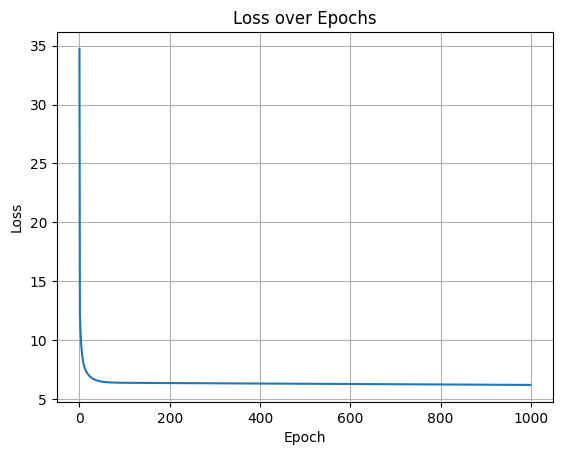

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class LinearRegression:
  def __init__(self, learning_rate = 0.01 , epochs =1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.w = None
    self.b = None


  def compute_loss(self,y_hat,y):
    m = len(y)
    mse = (1/m)*np.sum((y_hat-y)**2)
    return mse

  def fit(self, X, y):
      m, n = X.shape
      self.w = np.zeros(n)
      self.b = 0
      losses = []
      for epoch in range(self.epochs):
          total_loss = 0
          for i in range(m):
              dw = np.array(X[i])
              y_hat_i = np.dot(dw, self.w) + self.b
              error_i = y_hat_i - y[i]

              self.w -= self.learning_rate * (2 * error_i * dw / m)
              self.b -= self.learning_rate * (2 * error_i / m)

              total_loss += error_i ** 2

          losses.append(total_loss / m)

      self.losses = losses
      return losses


  def evaluate(self,X,y):
    y_hat = np.dot(X,self.w) + self.b
    loss = self.compute_loss(y_hat,y)
    return loss

  def plot_loss(self):
      plt.plot(range(self.epochs), self.losses)
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.title("Loss over Epochs")
      plt.grid(True)
      plt.show()

data = np.genfromtxt('advertising.csv',
                     delimiter=',',
                     skip_header=1)
X=data[:,:3]
y=data[:,-1]
np.random.seed(0)
indices = np.random.permutation(len(X))


split_index = int(0.8 * len(X)) #chia tập x thành 2 phần
#train_idx lấy 80% đầu (0->n-1) , test_idx lấy 20% sau (n->r-1)
train_idx, test_idx = indices[:split_index], indices[split_index:]


X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


model = LinearRegression(learning_rate= 0.0001 , epochs = 1000 )
model.fit(X_train,y_train)
losses = model.fit(X_train, y_train)


print(f"MSE:{model.evaluate(X_test,y_test)}")
model.plot_loss()


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [ ]:
print(data[:5])


[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3  12. ]
 [151.5  41.3  58.5  16.5]
 [180.8  10.8  58.4  17.9]]
